### 캘리포니아 데이터 불러오기

In [58]:
import pandas as pd

train = pd.read_csv("./Data/california_housing_train.csv")
test = pd.read_csv('./Data/california_housing_test.csv')

train.shape, test.shape

((17000, 9), (3000, 9))

In [59]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [60]:
test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

* 이 데이터는 경도, 위도 데이터가 있다.
* info() 결측치 확인 : 결측치가 없다.
* info() 자료형의 타입이 수치형이 대부분.
* total_bedrooms : 최소값이 1이고 최대값이 6445이다.
* https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ko

In [61]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [62]:
test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [63]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

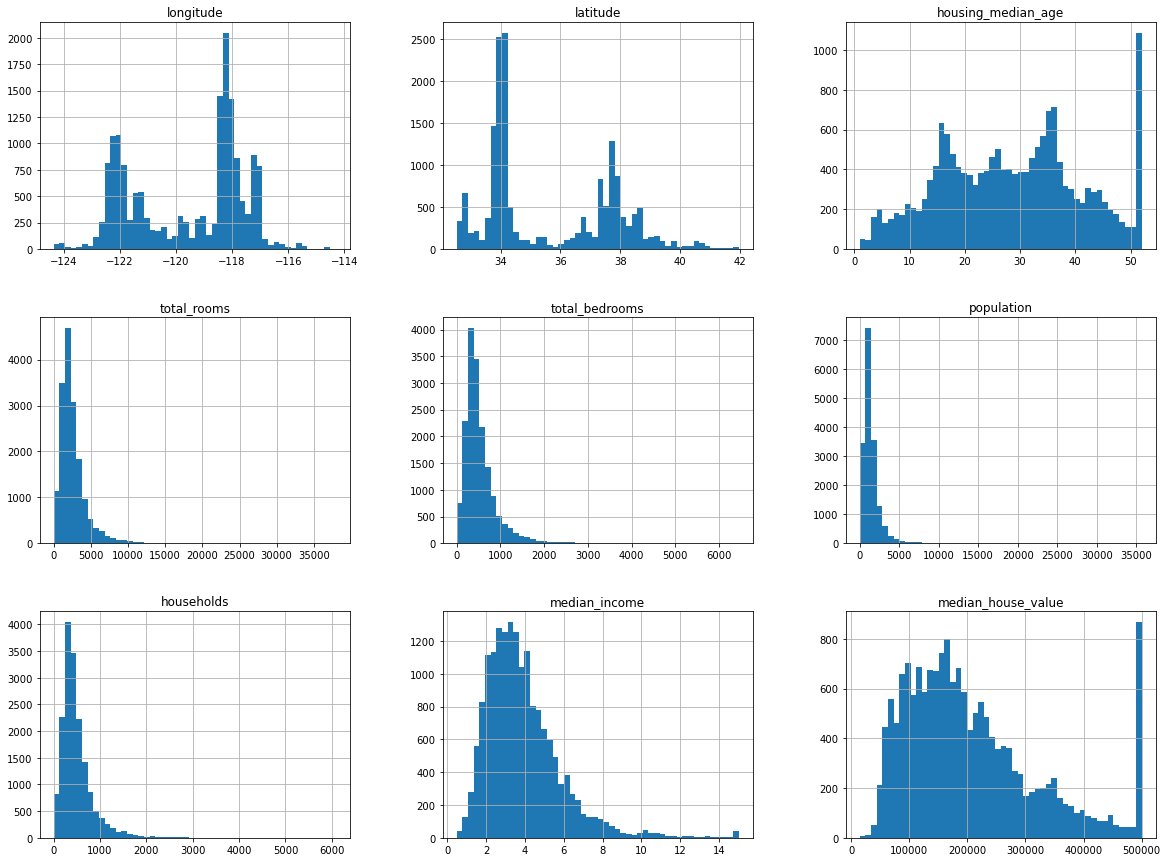

In [64]:
train.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

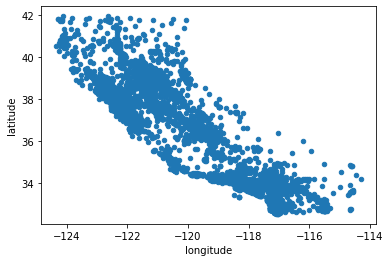

In [65]:
train.plot(kind = 'scatter',
          x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

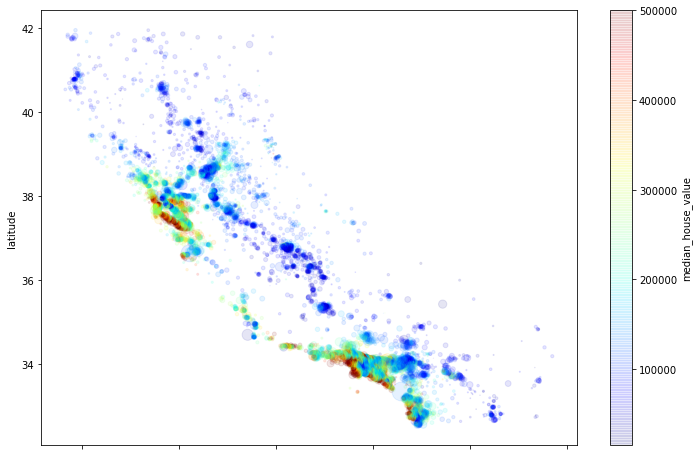

In [66]:
train.plot(kind='scatter',
          x='longitude', y='latitude',
          alpha=0.1,
          s=train['population']/100,
          c='median_house_value',
          cmap=plt.get_cmap('jet'),
          figsize=(12,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

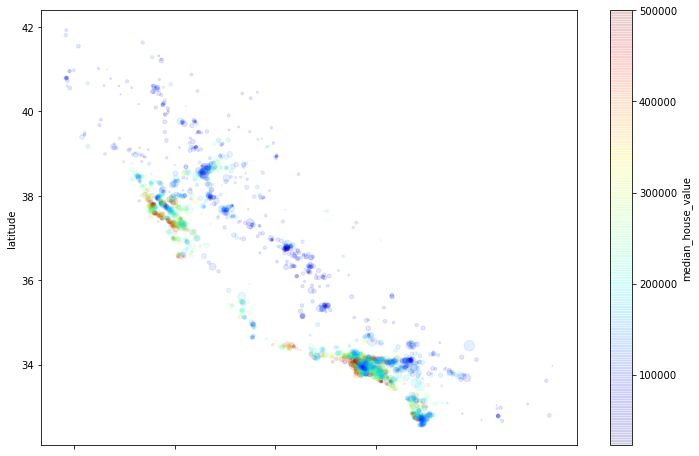

In [67]:
test.plot(kind='scatter',
          x='longitude', y='latitude',
          alpha=0.1,
          s=test['population']/100,
          c='median_house_value',
          cmap=plt.get_cmap('jet'),
          figsize=(12,8))

In [68]:
train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [69]:
sel = ['total_rooms', 'total_bedrooms', 'population']

temp_train = train[ sel ]

print("데이터 가공 셋의 크기 : ", temp_train.shape)
print("데이터 가공 셋의 일부 : ", temp_train.head)

데이터 가공 셋의 크기 :  (17000, 3)
데이터 가공 셋의 일부 :  <bound method NDFrame.head of        total_rooms  total_bedrooms  population
0           5612.0          1283.0      1015.0
1           7650.0          1901.0      1129.0
2            720.0           174.0       333.0
3           1501.0           337.0       515.0
4           1454.0           326.0       624.0
...            ...             ...         ...
16995       2217.0           394.0       907.0
16996       2349.0           528.0      1194.0
16997       2677.0           531.0      1244.0
16998       2672.0           552.0      1298.0
16999       1820.0           300.0       806.0

[17000 rows x 3 columns]>


In [70]:
temp_train.describe()

,total_rooms,total_bedrooms,population
count,17000.000000,17000.000000,17000.000000
mean,2643.664412,539.410824,1429.573941
std,2179.947071,421.499452,1147.852959
min,2.000000,1.000000,3.000000
25%,1462.000000,297.000000,790.000000
50%,2127.000000,434.000000,1167.000000
75%,3151.250000,648.250000,1721.000000
max,37937.000000,6445.000000,35682.000000


### 실습) 방이 37937이 어디에 위치하고 있는지 위도, 경도 값을 확보해보기

In [71]:
max_room_info = train.loc[ train['total_rooms']==37937 , : ]
max_room_info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0


In [72]:
max_bedroom_info = train.loc[ train['total_bedrooms']==6445 , : ]
max_bedroom_info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0


In [73]:
import seaborn as sns

<AxesSubplot:xlabel='population'>

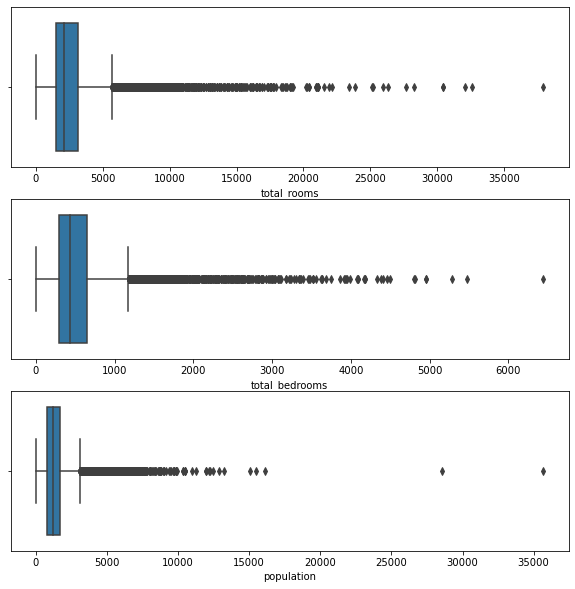

In [74]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(x='total_rooms', data=temp_train)
plt.subplot(3,1,2)
sns.boxplot(x='total_bedrooms', data=temp_train)
plt.subplot(3,1,3)
sns.boxplot(x='population', data=temp_train)

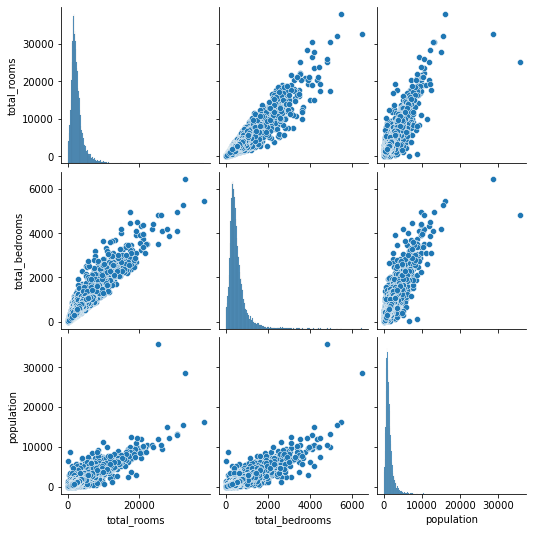

In [75]:
sns.pairplot(temp_train)

In [76]:
temp_train.corr()

,total_rooms,total_bedrooms,population
total_rooms,1.000000,0.928403,0.860170
total_bedrooms,0.928403,1.000000,0.881169
population,0.860170,0.881169,1.000000


<AxesSubplot:xlabel='median_house_value'>

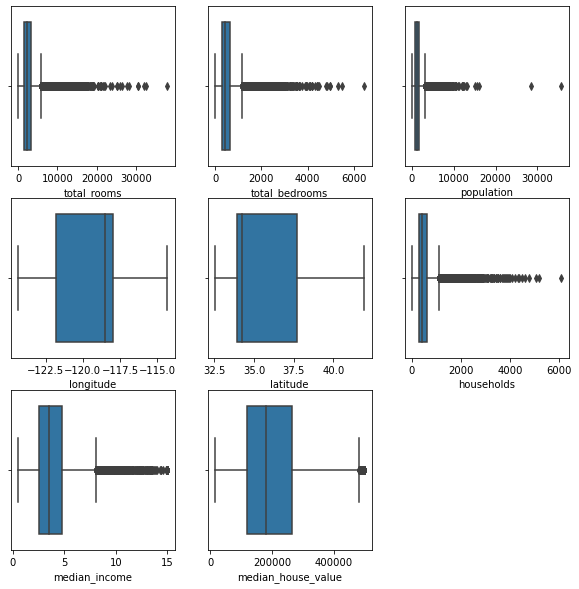

In [77]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1) 
sns.boxplot(x="total_rooms", data=train)
plt.subplot(3,3,2) 
sns.boxplot(x="total_bedrooms", data=train)
plt.subplot(3,3,3) 
sns.boxplot(x="population", data=train)  
plt.subplot(3,3,4) 
sns.boxplot(x="longitude", data=train)
plt.subplot(3,3,5) 
sns.boxplot(x="latitude", data=train)
plt.subplot(3,3,6) 
sns.boxplot(x="households", data=train)  
plt.subplot(3,3,7) 
sns.boxplot(x="median_income", data=train)
plt.subplot(3,3,8) 
sns.boxplot(x="median_house_value", data=train)

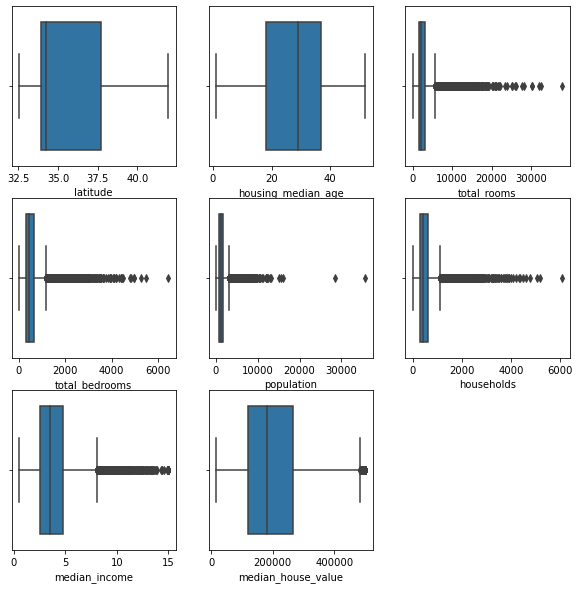

In [78]:
plt.figure(figsize=(10,10))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.boxplot(x=train.columns[i] , data=train)

In [79]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [80]:
## 두 컬럼 선택 8열, 9열
temp03 = train.iloc[:, [7, 8] ]
print( temp03.head() )

temp03 = train.iloc[:, [-2,-1] ]
print( temp03.head() )

   median_income  median_house_value
0         1.4936             66900.0
1         1.8200             80100.0
2         1.6509             85700.0
3         3.1917             73400.0
4         1.9250             65500.0
   median_income  median_house_value
0         1.4936             66900.0
1         1.8200             80100.0
2         1.6509             85700.0
3         3.1917             73400.0
4         1.9250             65500.0


In [81]:
train.total_rooms.describe()

count    17000.000000
mean      2643.664412
std       2179.947071
min          2.000000
25%       1462.000000
50%       2127.000000
75%       3151.250000
max      37937.000000
Name: total_rooms, dtype: float64

In [82]:
### Group01 3151 ~
### Group02 2127 ~ 3150
### Group03 1462 ~ 2127
### Group04 ~1462

In [83]:
tmp_A1 = train.loc[ train['total_rooms'] >= 3151 , : ]
tmp_A2 = train.loc[ (train['total_rooms'] >= 2127) & (train['total_rooms'] < 3151), : ]
tmp_A3 = train.loc[ (train['total_rooms'] >= 1462) & (train['total_rooms'] < 2127), : ]
tmp_A4 = train.loc[ (train['total_rooms'] < 1462), : ]

tmp_A1.shape, tmp_A2.shape, tmp_A3.shape, tmp_A4.shape

((4251, 9), (4257, 9), (4247, 9), (4245, 9))

In [84]:
tmp_A1 = train.loc[ train['total_rooms'] >= 3151 , 'room_level' ] = 1
tmp_A2 = train.loc[ (train['total_rooms'] >= 2127) & (train['total_rooms'] < 3151), 'room_level' ] = 2
tmp_A3 = train.loc[ (train['total_rooms'] >= 1462) & (train['total_rooms'] < 2127), 'room_level' ] = 3
tmp_A4 = train.loc[ (train['total_rooms'] < 1462), 'room_level' ] = 4

train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,4.0
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,2.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,2.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2.0


In [52]:
# train = train.drop( ['room_level'], axis=1, inplace=True)

In [54]:
train.columns

AttributeError: 'NoneType' object has no attribute 'columns'

### 실습
 * 테스트 데이터 셋도 동일한 기준으로 1, 2, 3, 4 그룹을 나누어보자.

In [49]:
test.total_rooms.describe()

count     3000.000000
mean      2599.578667
std       2155.593332
min          6.000000
25%       1401.000000
50%       2106.000000
75%       3129.000000
max      30450.000000
Name: total_rooms, dtype: float64

In [86]:
test_tmp_A1 = test.loc[ test['total_rooms'] >= 3151 , 'room_level' ] = 1
test_tmp_A2 = test.loc[ (test['total_rooms'] >= 2127) & (test['total_rooms'] < 3151), 'room_level' ] = 2
test_tmp_A3 = test.loc[ (test['total_rooms'] >= 1462) & (test['total_rooms'] < 2127), 'room_level' ] = 3
test_tmp_A4 = test.loc[ (test['total_rooms'] < 1462), 'room_level' ] = 4

test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,3.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,1.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,4.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,4.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,1.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,4.0


In [51]:
train.total_bedrooms.describe()

count    17000.000000
mean       539.410824
std        421.499452
min          1.000000
25%        297.000000
50%        434.000000
75%        648.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
 9   room_level          17000 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [88]:
train['room_level'] = train.room_level.astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           17000 non-null  float64 
 1   latitude            17000 non-null  float64 
 2   housing_median_age  17000 non-null  float64 
 3   total_rooms         17000 non-null  float64 
 4   total_bedrooms      17000 non-null  float64 
 5   population          17000 non-null  float64 
 6   households          17000 non-null  float64 
 7   median_income       17000 non-null  float64 
 8   median_house_value  17000 non-null  float64 
 9   room_level          17000 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.2 MB


<AxesSubplot:xlabel='room_level', ylabel='housing_median_age'>

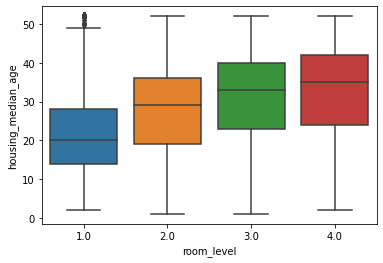

In [89]:
sns.boxplot(x='room_level', y='housing_median_age', data=train)

* 최신 건물이면 건물일수록 방수가 많다.

<AxesSubplot:xlabel='room_level', ylabel='housing_median_age'>

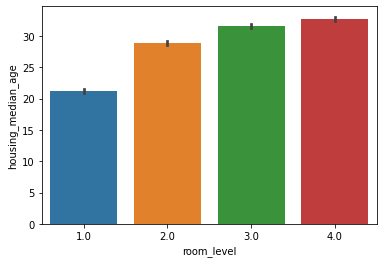

In [91]:
sns.barplot(x='room_level', y='housing_median_age', data=train)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           17000 non-null  float64 
 1   latitude            17000 non-null  float64 
 2   housing_median_age  17000 non-null  float64 
 3   total_rooms         17000 non-null  float64 
 4   total_bedrooms      17000 non-null  float64 
 5   population          17000 non-null  float64 
 6   households          17000 non-null  float64 
 7   median_income       17000 non-null  float64 
 8   median_house_value  17000 non-null  float64 
 9   room_level          17000 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.2 MB


### 3-5 room_level과 다른 변수들과의 관계를 시각화를 통해서 데이터의 관계를 이해해보기

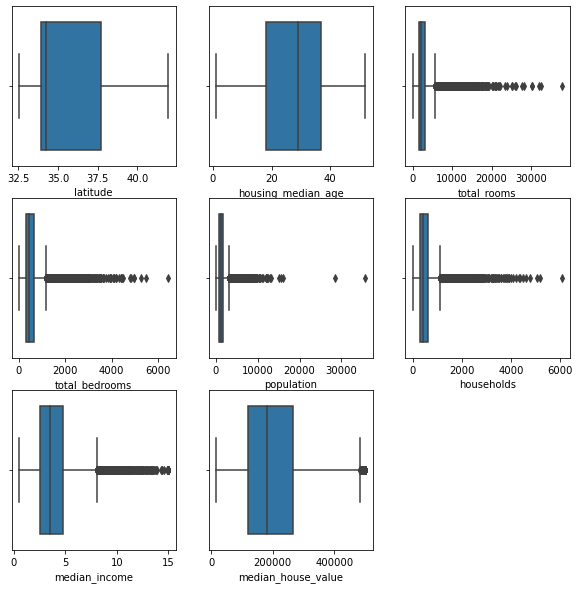

In [99]:
plt.figure(figsize=(10,10))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.boxplot(x=train.columns[i], data=train)

In [ ]:
tmp_A1 = train.loc[ train['total_bedrooms'] >= 3151 , : ]
tmp_A2 = train.loc[ (train['total_rooms'] >= 2127) & (train['total_rooms'] < 3151), : ]
tmp_A3 = train.loc[ (train['total_rooms'] >= 1462) & (train['total_rooms'] < 2127), : ]
tmp_A4 = train.loc[ (train['total_rooms'] < 1462), : ]

tmp_A1.shape, tmp_A2.shape, tmp_A3.shape, tmp_A4.shape